## Data Understanding: Notebook clearly describes the source and properties of the data to show how useful the data are for solving the problem of interest.  
-Describe the data sources and explain why the data are suitable for the project   
-Present the size of the dataset and descriptive statistics for all features used in the analysis   
-Justify the inclusion of features based on their properties and relevance for the project   
-Identify any limitations of the data that have implications for the project   


## Data Preparation: Notebook shows how you prepare your data and explains why by including…  
- Instructions or code needed to get and prepare the raw data for analysis  
- Code comments and text to explain what your data preparation code does  
- Valid justifications for why the steps you took are appropriate for the problem you are solving  

# NOAA Weather Data

## Obtaining the Data

In [1]:
#Importing libraries needed
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Understanding 

Data was obtained from the National Oceanic and Atmospheric Administration (NOAA) National Climatic Data Center (NCDC) using the Climate Data Online (CDO) database. The CDO provides free access to NCDC's archive of global historical weather and climate data in addition to station history information. These data include quality controlled daily, monthly, seasonal, and yearly measurements of temperature, precipitation, wind, and degree days as well as radar data and 30-year Climate Normals. 

Data from NOAA was selected because it provides daily summaries for average wind speed and fastest 2 minute wind gust for the five hurricanes we wanted to examine. 

### NOAA Data Column Descriptions   
|Column Name | Description | 
|---|---|
| **NAME**| is the name of the station (usually city/airport name). 
|**LATITUDE** | latitude (decimated degrees w/northern hemisphere values > 0, southern hemisphere values < 0)
| **LONGITUDE** |  longitude (decimated degrees w/western hemisphere values < 0, eastern hemisphere values > 0) 
| **DATE** |is the year of the record (4 digits) followed by month (2 digits) and day (2 digits).
|**AWND** |Average daily wind speed (meters per second) |    
|**WSF2** |  Fastest 2-minute wind speed (in meters per second) |  
|**HurricaneName**| Numerical label given to each hurricane. 1 = Charley, 2 = Dennis, 3 = Matthew, 4 = Irma, 5= Michael | 
|**COORD**| Engineered column representing coordinates created by combining LATITUDE and LONGITDE |
|**City** | Engineered column representing cities created by running coordinates through geopy reverse geolocater. |

### Citations:   
Centers N. Select a Location | Data Tools | Climate Data Online (CDO) | National Climatic Data Center (NCDC). Noaa.gov. Published 2019. https://www.ncdc.noaa.gov/cdo-web/datatools/selectlocation   

Hurricanes. coast.noaa.gov. https://coast.noaa.gov/hurricanes/

National Centers for Environmental Information (NCEI. Climate Data Online (CDO) - The National Climatic Data Center’s (NCDC) Climate Data Online (CDO) provides free access to NCDC’s archive of historical weather and climate data in addition to station history information. | National Climatic Data Center (NCDC). Noaa.gov. Published 2019. https://www.ncdc.noaa.gov/cdo-web/   



In [2]:
#opening the datasets
matthew = pd.read_csv(r'data\matthew.csv')
irma =  pd.read_csv(r'data\irma.csv')
michael =  pd.read_csv(r'data\michael.csv')
charley = pd.read_csv(r'data\charley.csv')
dennis = pd.read_csv(r'data\dennis.csv')

## Data Engineering 
We want to be able to compare data from all five hurricanes against home value. So we are going to concat them all into one data frame. 

### Concating the Hurricane Dataframes

In [3]:
#creating a column with a label for each hurricane 
#this way we can still know which hurricane we are referencing

#1 = charley
charley['HurricaneName'] = 'charley'

#2 = dennis 
dennis['HurricaneName'] = 'dennis'

#3 = matthew 
matthew['HurricaneName'] = 'matthew'

#4 = irma 
irma['HurricaneName'] = 'irma'

#5 michael 
michael['HurricaneName'] = 'michael'

In [4]:
#making sure it looks good 
charley.head()

,NAME,LATITUDE,LONGITUDE,DATE,AWND,WSF2,HurricaneName
0,"FORT PIERCE, FL US",27.4419,-80.3508,8/13/2004,NaN,NaN,charley
1,"FORT PIERCE, FL US",27.4419,-80.3508,8/14/2004,NaN,NaN,charley
2,"FORT PIERCE ARC, FL US",27.4272,-80.4053,8/13/2004,NaN,NaN,charley
3,"FORT PIERCE ARC, FL US",27.4272,-80.4053,8/14/2004,NaN,NaN,charley
4,"BIG CYPRESS, FL US",26.3283,-80.9958,8/13/2004,NaN,NaN,charley


In [5]:
#concating the five dataframes into one 
hurricane = pd.concat([charley, dennis, matthew, irma, michael], ignore_index=True)
hurricane.head()

,NAME,LATITUDE,LONGITUDE,DATE,AWND,WSF2,HurricaneName
0,"FORT PIERCE, FL US",27.4419,-80.3508,8/13/2004,NaN,NaN,charley
1,"FORT PIERCE, FL US",27.4419,-80.3508,8/14/2004,NaN,NaN,charley
2,"FORT PIERCE ARC, FL US",27.4272,-80.4053,8/13/2004,NaN,NaN,charley
3,"FORT PIERCE ARC, FL US",27.4272,-80.4053,8/14/2004,NaN,NaN,charley
4,"BIG CYPRESS, FL US",26.3283,-80.9958,8/13/2004,NaN,NaN,charley


In [6]:
#data types are object and float 
#currently have 5571 entries 
#AWND is missing a lot of values 
hurricane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NAME           5571 non-null   object 
 1   LATITUDE       5571 non-null   float64
 2   LONGITUDE      5571 non-null   float64
 3   DATE           5571 non-null   object 
 4   AWND           501 non-null    float64
 5   WSF2           508 non-null    float64
 6   HurricaneName  5571 non-null   object 
dtypes: float64(4), object(3)
memory usage: 304.8+ KB


### Scrubbing the Data

In [7]:
#AWND is missing 5070 
#We are going to drop any rows where wind speed is missing
#Dropping is the best solution here because wind speed 
#Will not be accurately reflected by the mean in cities hit by the hurricane 
hurricane.isnull().sum()

NAME                0
LATITUDE            0
LONGITUDE           0
DATE                0
AWND             5070
WSF2             5063
HurricaneName       0
dtype: int64

In [8]:
#dropping all rows with missing values 
hurricane.dropna(inplace= True)

In [9]:
#checking that dataframe is clean 
hurricane.isnull().sum()

NAME             0
LATITUDE         0
LONGITUDE        0
DATE             0
AWND             0
WSF2             0
HurricaneName    0
dtype: int64

### Data Exploration

#### Exploring all hurricanes
The fastest average wind speed accross all hurricanes was 40.71 meters per second or about 91.04 miles per hour. The fastest 2 minunte wind gust was 79 meters per second or about 176 miles per hour. 

In [10]:
#Looking at stats for all hurricanes 
hurricane.describe()

,LATITUDE,LONGITUDE,AWND,WSF2
count,492.000000,492.000000,492.000000,492.000000
mean,28.201832,-82.336522,13.661077,26.843496
std,1.865800,2.043343,6.785847,12.548473
min,24.557060,-87.185750,2.910000,0.000000
25%,26.538050,-82.685550,8.665000,18.100000
50%,28.061370,-81.756840,12.300000,23.900000
75%,30.233330,-80.635600,16.550000,31.100000
max,30.843150,-80.099180,40.710000,79.000000


#### Visualizing Wind Speed 

In [11]:
#creating a scatterplot function 
def scatterplot(df):
    #importing image for background 
    img = plt.imread(r"data\images\floridamap.jpg")
    fig, ax = plt.subplots()
    ax.imshow(img, extent=[-87, -80, 25, 31])
    #plotting scatter plot 
    plt.scatter(x=df['LONGITUDE'], y=df['LATITUDE'], s=50, c=df['WSF2'], cmap='plasma')
    #title
    plt.title('Fastest 2 Minute Wind Gust')
    #xlabel
    plt.xlabel('Longitude')
    #y label
    plt.ylabel('Latitude')
    #legen
    ax.legend(df['HurricaneName'])
    return plt.show()

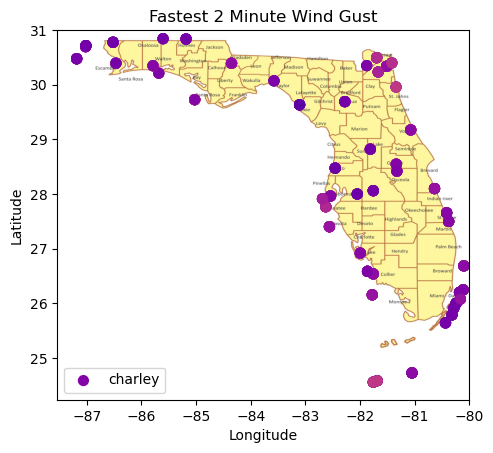

In [12]:
scatterplot(hurricane)

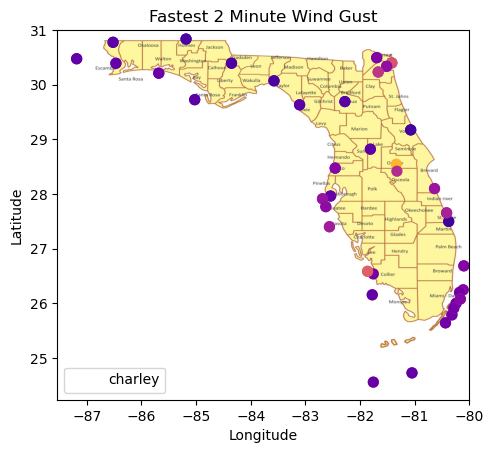

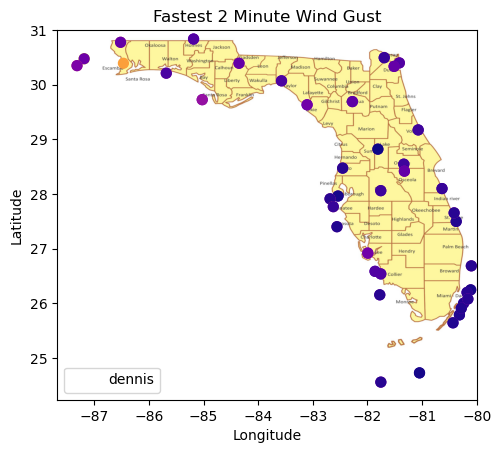

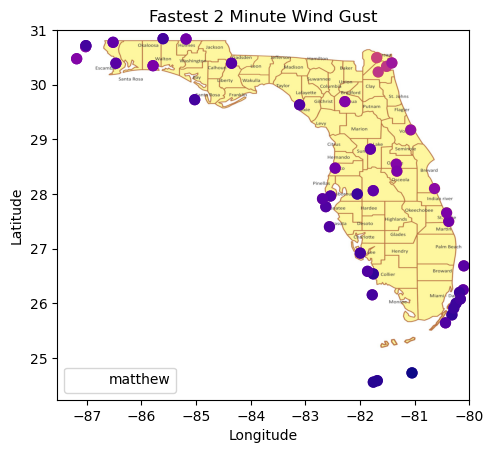

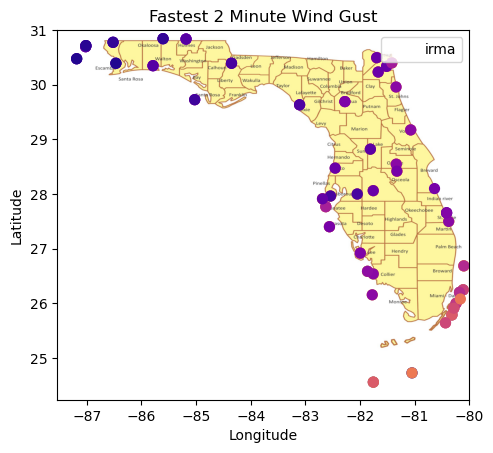

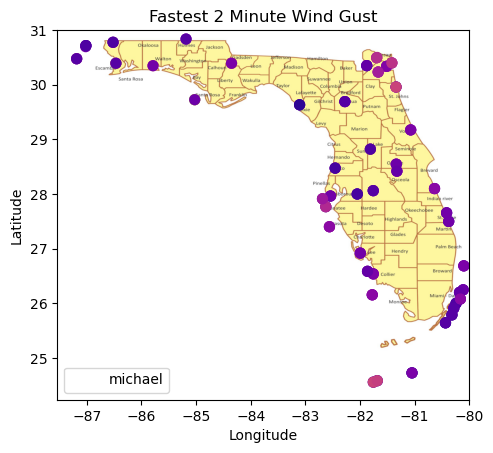

In [13]:
scatterplot(charley)
scatterplot(dennis)
scatterplot(matthew)
scatterplot(irma)
scatterplot(michael)

### Data Engingeering 

#### Using Geopy to Get Cities

In order to join the hurricane dataframe to the housing dataframe we will need to know the city names. Using the coordinates provided by the NOAA dataset we can use geopy to reverse geolocate the city names. 

Due to this being an API not all request could be completed and some city names had to be annoitated in excel. 

Citation:  
kumar_satyam. Get the city, state, and country names from latitude and longitude using Python. GeeksforGeeks. Published October 15, 2020. https://www.geeksforgeeks.org/get-the-city-state-and-country-names-from-latitude-and-longitude-using-python/

In [14]:
#importing libraries 
from tkinter import *
from geopy.geocoders import Nominatim
from geopy.geocoders import Photon

# Create an instance of tkinter frame
win = Tk()

# Define geometry of the window
win.geometry("700x350")

''

#### Getting Coordinates

In [15]:
#Engingeering a coordinates column out of latitude and longitude 
#We need coordinates to use geopy 

hurricane['COORD'] = list(zip(hurricane.LATITUDE, hurricane.LONGITUDE))

hurricane.head()

,NAME,LATITUDE,LONGITUDE,DATE,AWND,WSF2,HurricaneName,COORD
10,"JACKSONVILLE INTERNATIONAL AIRPORT, FL US",30.49529,-81.69374,8/13/2004,5.59,21.0,charley,"(30.49529, -81.69374)"
11,"JACKSONVILLE INTERNATIONAL AIRPORT, FL US",30.49529,-81.69374,8/14/2004,6.49,19.9,charley,"(30.49529, -81.69374)"
18,"CRESTVIEW FAA AP, FL US",30.77715,-86.51938,8/13/2004,7.16,13.0,charley,"(30.77715, -86.51938)"
19,"CRESTVIEW FAA AP, FL US",30.77715,-86.51938,8/14/2004,5.59,13.0,charley,"(30.77715, -86.51938)"
30,"MARIANNA MUNICIPAL AIRPORT, FL US",30.83696,-85.18352,8/13/2004,6.93,13.0,charley,"(30.83696, -85.18352)"


In [16]:
#creating a function 
def get_city(coords):
    #instantiate the Nominatim API 
    geolocator = Nominatim(user_agent="MyApp")
    #get the city from the coordinates 
    location = geolocator.reverse(coords)
    address = location.raw['address']
    city = address.get('city', '')
    #return the city 
    return city

In [17]:
#applying function to dataframe
hurricane['City'] = hurricane['COORD'].apply(get_city)

In [18]:
#looks good 
hurricane.isnull().sum()

NAME             0
LATITUDE         0
LONGITUDE        0
DATE             0
AWND             0
WSF2             0
HurricaneName    0
COORD            0
City             0
dtype: int64

#### Saving the Dataframe 

In [19]:
#saving the dataframe
hurricane.to_csv(r'data\hurricane.csv', index=False)